In [1]:
import cv2
from matplotlib import pyplot as plt


Missing colon in file 'C:\\Users\\somakiko\\.matplotlib\\matplotlibrc', line 2 ('\x00')
Missing colon in file 'C:\\Users\\somakiko\\.matplotlib\\matplotlibrc', line 4 ('\x00')
Missing colon in file 'C:\\Users\\somakiko\\.matplotlib\\matplotlibrc', line 5 ('\x00')

Bad key ے‏b a c k e n d  in file C:\Users\somakiko\.matplotlib\matplotlibrc, line 1 ('ے\u200fb\x00a\x00c\x00k\x00e\x00n\x00d\x00:\x00 \x00T\x00k\x00A\x00g\x00g\x00')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key  b a c k e n d  in file C:\Users\somakiko\.matplotlib\matplotlibrc, line 3 ('\x00b\x00a\x00c\x00k\x00e\x00n\x00d\x00:\x00 \x00T\x00k\x00A\x00g\x00g\x00')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution


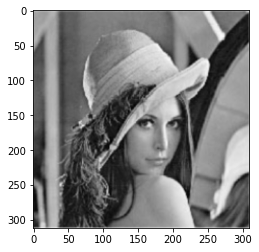

In [61]:
img = cv2.imread('lena.jpg',0)
plt.imshow(img,cmap='gray')

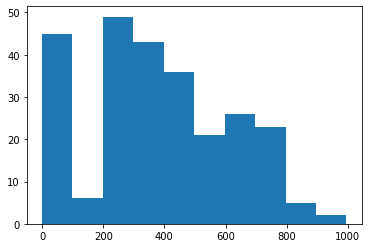

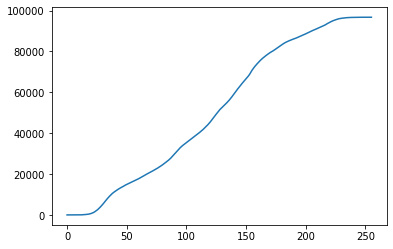

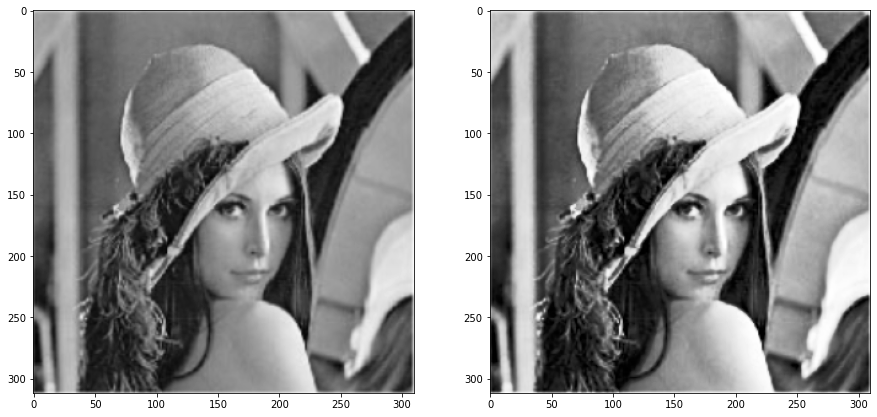

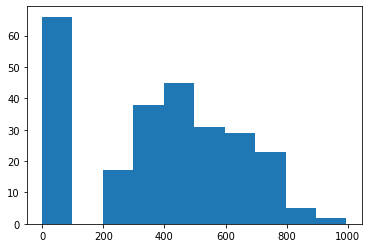

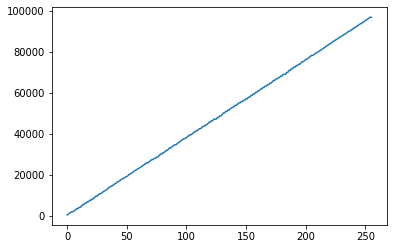

array([[254, 254, 254, ..., 254, 254, 254],
       [240, 227, 224, ..., 228, 239, 253],
       [233, 215, 207, ..., 211, 228, 249],
       ...,
       [ 98,  31,   6, ...,  75, 150, 229],
       [128,  55,  44, ..., 114, 188, 235],
       [207, 146, 135, ..., 207, 227, 248]], dtype=uint8)

In [50]:
def getFlatttenedImage(img):
    img = np.asarray(img)
    img = img.flatten()

    return img
getEqualised(img)

In [49]:
def get_histogram(img, bins):
    flattenedImage = getFlatttenedImage(img)

    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in flattenedImage:
        histogram[pixel] += 1
    plt.clf()
    plt.hist(histogram)
    plt.show()
    # return our final result
    return histogram


In [41]:
def cumsum(img):
    a = get_histogram(img,256)
    a = np.array(a)
    b = []

    isFirstElement = True
    for i in a:
        if isFirstElement:
            b.append(a[0])
            isFirstElement = False
            continue
        b.append(b[-1] + i)
    
    b = np.array(b)
    plt.clf()
    plt.plot(b)
    plt.show()
    return b

In [42]:
import numpy as np
def getEqualised(img):
    
    cumulativeSum = cumsum(img)

    cumulativeSum /= cumulativeSum[-1]
    cumulativeSum *= 255
    cumulativeSum = cumulativeSum.astype('uint8')
    
    flattenedImg = getFlatttenedImage(img)
    newImg = cumulativeSum[flattenedImg]
    newImg = np.reshape(newImg,img.shape)


    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)

    fig.add_subplot(1,2,1)
    plt.imshow(img, cmap='gray')

    # display the new image
    fig.add_subplot(1,2,2)
    plt.imshow(newImg, cmap='gray')

    plt.show(block=True)

    cumsum(newImg)


    return newImg

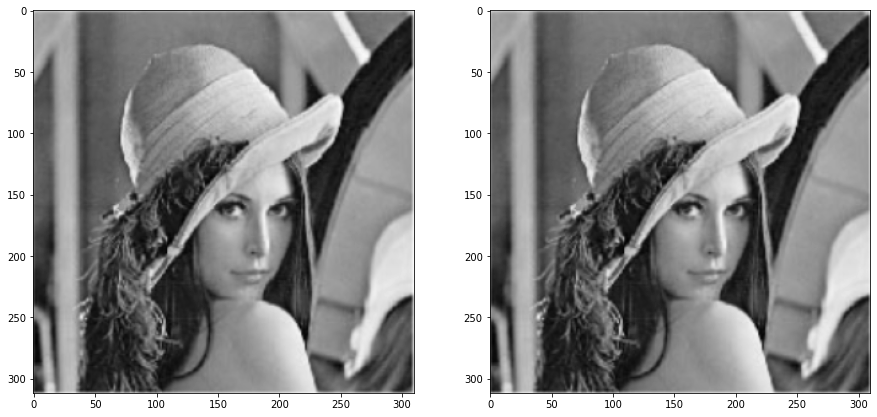

In [75]:
from copy import deepcopy

def getNormalisedImg(img):
    newImg =  deepcopy(img)
    rows = img.shape[0]
    columns = img.shape[1]
    for i in range(rows):
        for j in range(columns):
            newImg[i][j] = newImg[i][j]/(255) * 400

    return newImg
newImg = getNormalisedImg(img)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(newImg, cmap='gray')

plt.show(block=True)